# Libs and SOS instance

In [1]:
%load_ext autoreload
%autoreload 2

from owslib.swe.observation.sos200 import SosCapabilitiesReader
from owslib.sos import SensorObservationService
from owslib.swe.observation.sos200 import SOSGetObservationResponse
from owslib.swe.sensor.sml import SensorML
from owslib.etree import etree
from sos4py.main import connection_sos
from sos4py.sos_2_0_0 import SOSGetFeatureOfInterestResponse

from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
import pyproj 
from shapely.geometry import Point
import contextily as ctx
import folium

In [2]:
# Create SOS instance from owslib
fluggs = SensorObservationService('https://fluggs.wupperverband.de/sos2/service',version='2.0.0')

# Create SOS instance from sos4py (for improved data availability and getting feature of interest)
fluggs_sos4py = connection_sos("https://fluggs.wupperverband.de/sos2/service")

# Learn about content of SOS 

### Using owslib

In [107]:
# In owslib, there are no functions to show a complete overview of the SOS.
# Info has to be obtained by accessing different object attributes.

# 1) Check attributes of SOS instance for metadata: 
#    identification, provider, operations, contents, offerings, observed_properties
# 2) Use the <get_operation_by_name> method which returns an <OperationsMetadata> object and check its attributes: 
#    name, formatOptions, methods, constraints, parameters


# GetCapabilities as raw xml
#print("----- Capabilities -----", fluggs._capabilities) # html element
#print(etree.tostring(fluggs._capabilities, encoding='utf8', method='xml'))

# Info about service
print("----- Service -----")
print("title: ", fluggs.identification.title)
print("abstract: ", fluggs.identification.abstract)
print("keywords: ", fluggs.identification.keywords)
print("access constraints: ", fluggs.identification.accessconstraints)
print("fees: ", fluggs.identification.fees)
print("type: ", fluggs.identification.type)
print("version: ", fluggs.identification.version)
print("versions: ", fluggs.identification.versions)
print("profiles: ", fluggs.identification.profiles)

# Info about provider
print("\n----- Provider -----")
print("name: ",fluggs.provider.name)
#print("name",fluggs.provider.contact.name)
print("organization: ",fluggs.provider.contact.organization)
print("site: ",fluggs.provider.contact.site)
print("role: ",fluggs.provider.contact.role)
print("position: ",fluggs.provider.contact.position)
print("phone: ",fluggs.provider.contact.phone)
print("fax: ",fluggs.provider.contact.fax)
print("address: ",fluggs.provider.contact.address)
print("city: ",fluggs.provider.contact.city)
print("region: ",fluggs.provider.contact.region)
print("postcode: ",fluggs.provider.contact.postcode)
print("country: ",fluggs.provider.contact.country)
print("email: ",fluggs.provider.contact.email)
print("url: ",fluggs.provider.contact.url)
print("hours: ",fluggs.provider.contact.hours)
print("instructions: ",fluggs.provider.contact.instructions)

# Info about SOS operations
print("\n----- Operations -----")
for operation in fluggs.operations:
    print(operation)
    
# Info about all offerings
print("\n----- Offerings -----")
for offering in fluggs.offerings:
    print(offering.name)

# Info about all available phenomena (independent of e.g feature of interest or offering)
print("\n----- Phenomena -----")
phenomena_unique = set()
for offering in fluggs.offerings:
    for prop in offering.observed_properties:
        phenomena_unique.add(prop)   
print(phenomena_unique)

# Info about all features of interest
print("\n----- Features of interest -----")
get_foi = fluggs.get_operation_by_name('GetFeatureOfInterest') # <class 'owslib.ows.OperationsMetadata'>
try:
    x = unicode('test')
    for x in sorted(get_foi.parameters['featureOfInterest']['values']):
        print(x.encode('utf8'))
except:
    for x in sorted(get_foi.parameters['featureOfInterest']['values']):
        print(x)

# Complete overview of available data 
print("\n----- Data availability -----")
for offering in fluggs.offerings:
    print()
    print("Offering: ", offering.name)
    #print(offering.id)
    print("Observed properties: ")
    for prop in offering.observed_properties:
        print(prop)
    print("Bounding box: ")
    print(offering.bbox)
    print("Bounding box srs: ")
    print(offering.bbox_srs)
    print("Procedure description formats: ")
    print(offering.procedure_description_formats)
    print("Features of interest: ")
    print(offering.features_of_interest)
    print("Phenomenon time (begin, end): ")
    print(offering.begin_position, offering.end_position)
    print("Response formats: ")
    print(offering.response_formats)
    print("Observation models: ")
    print(offering.observation_models)

----- Service -----
title:  Wupperverband SOS
abstract:  Wupperverband Sensor Observation Service - Data Access for the Wupper Catchment Area
keywords:  ['Gewässergüte', 'Hydrologie', 'Meteorologie']
access constraints:  http://fluggs.wupperverband.de/fluggs-cms-bilder-dokumente/Downloads/Nutzungsbedingungen_Dienste_Wupperverband.pdf
fees:  NONE
type:  OGC:SOS
version:  2.0.0
versions:  ['2.0.0']
profiles:  ['http://www.opengis.net/spec/OMXML/2.0/conf/categoryObservation', 'http://www.opengis.net/spec/OMXML/2.0/conf/countObservation', 'http://www.opengis.net/spec/OMXML/2.0/conf/geometryObservation', 'http://www.opengis.net/spec/OMXML/2.0/conf/measurement', 'http://www.opengis.net/spec/OMXML/2.0/conf/samplingCurve', 'http://www.opengis.net/spec/OMXML/2.0/conf/samplingPoint', 'http://www.opengis.net/spec/OMXML/2.0/conf/samplingSurface', 'http://www.opengis.net/spec/OMXML/2.0/conf/spatialSampling', 'http://www.opengis.net/spec/OMXML/2.0/conf/textObservation', 'http://www.opengis.net/spec/

### Using sos4py

In [92]:
# Info about service
print("----- Service -----")
print(fluggs_sos4py.sosServiceIdentification())
#print(fluggs_sos4py.sosServiceIdentification()['profiles'])

# Info about provider
print("\n----- Provider -----")
print(fluggs_sos4py.sosProvider())

# Info about SOS operations
print("\n----- Operations -----")
print(fluggs_sos4py.sosOperationsMetadata())
#print(fluggs_sos4py.sosOperationsMetadata()[1]['Name'])

# Info about all offerings
print("\n----- Offerings -----")
print(fluggs_sos4py.sosOfferings())
#print(fluggs_sos4py.sosOfferings()[1])
#print(fluggs_sos4py.sosOfferings()[1]['bbox'])

# Info about all available phenomena (independent of e.g feature of interest or offering)
print("\n----- Phenomena -----")
print(fluggs_sos4py.sosPhenomena())

# Complete overview of available data 
print("\n----- Data availability -----")
print(fluggs_sos4py.get_data_availability())

----- Service -----
_root                [[], [], [[], [], []], [], [], [], [], [], [],...
title                                                Wupperverband SOS
abstract             Wupperverband Sensor Observation Service - Dat...
keywords                      [Gewässergüte, Hydrologie, Meteorologie]
accessconstraints    http://fluggs.wupperverband.de/fluggs-cms-bild...
fees                                                              NONE
type                                                           OGC:SOS
service                                                        OGC:SOS
version                                                          2.0.0
versions                                                       [2.0.0]
profiles             [http://www.opengis.net/spec/OMXML/2.0/conf/ca...
Name: ServiceIdentification, dtype: object

----- Provider -----
_root           [[], [], [[], [], [<Element {http://www.opengi...
name                                                          TBA
or

[Procedure                                                     2m_Tiefe
ObservedProperty                                      Wassertemperatur
FeatureOfInterest                     Eschbachtalsperre_Absperrbauwerk
PhenomenonTime       start: 2008-07-10 23:00:00+00:00 end: 2020-07-...
StartTime                                    2008-07-10 23:00:00+00:00
EndTime                                      2020-07-27 11:00:00+00:00
ResultTime                                                        None
Name: gda_member, dtype: object, Procedure                                                     2m_Tiefe
ObservedProperty                                      Wassertemperatur
FeatureOfInterest                       Bever-Talsperre_Absperrbauwerk
PhenomenonTime       start: 2008-07-09 23:00:00+00:00 end: 2020-07-...
StartTime                                    2008-07-09 23:00:00+00:00
EndTime                                      2020-07-30 11:00:00+00:00
ResultTime                                 

#### DescribeSensor in oswlib

In [ ]:
# Check parameters for DescribeSensor operation

describe_sensor = fluggs.get_operation_by_name('DescribeSensor') # <class 'owslib.ows.OperationsMetadata'>
# OperationsMetadata object has attributes: name, formatOptions, methods, constraints, parameters

print(describe_sensor.parameters['procedure']['values']) 
print(describe_sensor.parameters['procedureDescriptionFormat']['values']) 

In [ ]:
# Apply <describe_sensor> method

output_format = 'http://www.opengis.net/sensorML/1.0.1'
procedure = '2m_Tiefe'

response = fluggs.describe_sensor(outputFormat=output_format, procedure=procedure)
xml_tree = etree.fromstring(response)
parsed_response = SensorML(xml_tree)
print(parsed_response)
print(parsed_response.members)
#print(etree.tostring(parsed_response, encoding='utf8', method='xml')) # SensorML cannot be serialized

# members are of type System, ProcessChain, ProcessModel or Component

#for member in parsed_response.members: 
#    print(member)
    

# Spatial data

### Get spatial data

In [112]:
# Using sos4py

# Get response from SOS
response = fluggs_sos4py.get_feature_of_interest()          # <class 'bytes'>
xml_tree = etree.fromstring(response)                       # <class 'lxml.etree._Element'>
parsed_response = SOSGetFeatureOfInterestResponse(xml_tree) # <class 'sos4py.sos_2_0_0.SOSGetFeatureOfInterestResponse'>

# Save features of interest with their geometry in a GeoDataFrame
fois = []
points = []
for foi in parsed_response.features:
    fois.append(foi.name)
    points.append(Point(foi.get_geometry()[1],foi.get_geometry()[0])) # Point expects (x, y)
    
crs = pyproj.CRS.from_user_input(int(parsed_response.features[0].get_srs().split("/")[-1]))
sites = gpd.GeoDataFrame({'foi': fois, 'geometry': gpd.GeoSeries(points)},  crs=crs)
sites = sites.to_crs('epsg:4326') 

sites.head()

,foi,geometry
0,Barmen Wupperverband Hauptverwaltung,POINT (7.20441 51.26608)
1,Bever-Talsperre,POINT (7.36564 51.14334)
2,"Bever-Talsperre, Absperrbauwerk",POINT (7.36708 51.14309)
3,"Bever-Talsperre, Windenhaus",POINT (7.37357 51.14135)
4,Beyenburg,POINT (7.29930 51.24927)


In [113]:
# Get specific feature of interest from SOS
featureOfInterest = 'Neyetalsperre_Absperrbauwerk'

response = fluggs_sos4py.get_feature_of_interest(featureOfInterest=featureOfInterest)
xml_tree = etree.fromstring(response)
parsed_response = SOSGetFeatureOfInterestResponse(xml_tree)

print(parsed_response.features[0].name)
print(parsed_response.features[0].get_geometry())
print(parsed_response.features[0].get_srs())

Neyetalsperre, Absperrbauwerk
(5667840.432, 2597555.35)
http://www.opengis.net/def/crs/EPSG/0/31466


### Plot spatial data

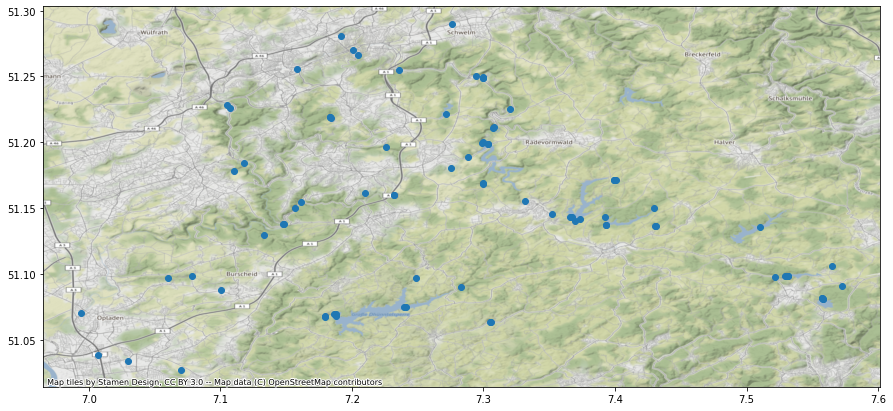

In [114]:
# Static using GeoDataframe.plot

# sites = sites.to_crs('epsg:3857') # epsg:4326
ax = sites.plot(figsize=(15, 15))
ctx.add_basemap(ax, crs=sites.crs.to_string())
# optional parameters:
# source=ctx.providers.OpenStreetMap.Mapnik
# zoom=12
ax

In [115]:
# Interactive using folium

lngs = list(sites['geometry'].apply(lambda coord: coord.x))
lats = list(sites['geometry'].apply(lambda coord: coord.y))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

# folium uses (lat, long) or (y, x), respectively
locationlist = [[site.y, site.x] for site in sites['geometry']]

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=10)
for point in range(0, len(locationlist)):
    popup = folium.Popup(folium.IFrame(html=sites['foi'][point], width=200, height=80))
    folium.Marker(locationlist[point], popup=popup).add_to(m)
m

# Sensor data

### Get sensor data

In [123]:
# Check parameters for GetObservation request

get_observation = fluggs.get_operation_by_name('GetObservation') # <class 'owslib.ows.OperationsMetadata'>

print(get_observation.parameters['responseFormat']['values'])
print(get_observation.parameters['offering']['values']) 
print(get_observation.parameters['observedProperty']['values']) 

['http://www.opengis.net/om/2.0', 'http://www.opengis.net/waterml-dr/2.0', 'http://www.opengis.net/waterml/2.0']
['Zeitreihen_2m_Tiefe', 'Zeitreihen_Einzelwerte', 'Zeitreihen_LANUV', 'Zeitreihen_Oberflaeche', 'Zeitreihen_Stundenmittel', 'Zeitreihen_Stundensumme', 'Zeitreihen_Tagesmittelwert_um_17-00_Uhr', 'Zeitreihen_Tagesmittelwerte', 'Zeitreihen_Tagessumme']
['Abfluss', 'Elektrische_Leitfaehigkeit', 'Luftfeuchte', 'Lufttemperatur', 'Niederschlagshoehe', 'Sauerstoffgehalt', 'Speicherfuellstand', 'Speicherinhalt', 'Truebung', 'Wasserstand', 'Wassertemperatur', 'pH-Wert']


In [125]:
# Using owslib 

# Get response from SOS
event_time = 'om:resultTime,2019-01-01/2019-01-31' 
offerings = ['Zeitreihen_2m_Tiefe']
observed_properties = ['Wassertemperatur']
response_format = 'http://www.opengis.net/om/2.0'

response = fluggs.get_observation(offerings=offerings,
                                  observedProperties=observed_properties, 
                                  eventTime=event_time,
                                  responseFormat=response_format) # <class 'bytes'>
xml_tree = etree.fromstring(response)                             # <class 'lxml.etree._Element'>
parsed_response = SOSGetObservationResponse(xml_tree)             # <class 'owslib.swe.observation.sos200.SOSGetObservationResponse'>


# Save observation data in a DataFrame

print("Number of observations:",len(parsed_response.observations))
    
fois = []
procedures = [] 
phenomena = []
phenomenon_times = []
result_times = []
values = []
uoms = []

for mo in parsed_response.observations:
    #print(type(mo))      # <class 'owslib.swe.observation.om.MeasurementObservation'>
    fois.append(mo.featureOfInterest)
    procedures.append(mo.procedure)
    phenomena.append(mo.observedProperty)
    phenomenon_times.append(mo.phenomenonTime)
    result_times.append(mo.resultTime)
    values.append(mo.get_result().value)
    uoms.append(mo.get_result().uom)

observations = pd.DataFrame({'foi': fois, 'procedure': procedures, 'phenomenon' : phenomena, 'phenomenonTime': phenomenon_times, 'resultTime': result_times, 'value': values, 'unit': uoms})
observations.head()

Number of observations: 141


,foi,procedure,phenomenon,phenomenonTime,resultTime,value,unit
0,Eschbachtalsperre_Absperrbauwerk,2m_Tiefe,Wassertemperatur,None,2019-01-01 23:00:00+00:00,5.5,°C
1,Eschbachtalsperre_Absperrbauwerk,2m_Tiefe,Wassertemperatur,None,2019-01-07 23:00:00+00:00,5.0,°C
2,Eschbachtalsperre_Absperrbauwerk,2m_Tiefe,Wassertemperatur,None,2019-01-15 23:00:00+00:00,6.0,°C
3,Eschbachtalsperre_Absperrbauwerk,2m_Tiefe,Wassertemperatur,None,2019-01-22 23:00:00+00:00,0.0,°C
4,Eschbachtalsperre_Absperrbauwerk,2m_Tiefe,Wassertemperatur,None,2019-01-28 23:00:00+00:00,3.5,°C


### Plot sensor data

Text(0.5, 1.0, 'Eschbachtalsperre_Absperrbauwerk')

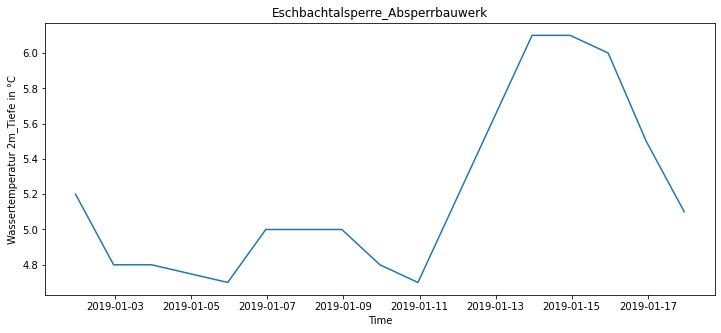

In [140]:
foi = 'Schevelinger-Talsperre_Absperrbauwerk'
x = observations[observations['foi']==foi]['resultTime'].to_numpy()
y = observations[observations['foi']==foi]['value'].to_numpy()

plt.figure(figsize=(12,5))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel(observations['phenomenon'][0] + " " + observations['procedure'][0] + " in " + observations['unit'][0])
plt.title(observations['foi'][0])